# P419 07 Функции

Автор: Шабанов Павел Александрович

Email: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

**Дата последнего обновления: 28.10.2018**

<a id='up'></a>
### План

1. **[Пользовательские функции](#dеf_func)**
    + [вызов функции](#call);
    + [return](#return).
2. **[Локальные и глобальные переменные](#local)**
3. **[Аргументы функций](#def_params)**;
    + [примеры функций](#def_examples);
        + [формула гаверсинусов](#haversine);
        + [корреляция Пирсона](#pearson);
    + [распаковка аргументов](#def_unpack).

4. **[Анонимные функции](#lambda)**

5. **[Функция от функции](#ff)**
    + [декораторы](#deco).


### URLs:

+ [Функциональное программирование в Python](http://pythonicway.com/python-functinal-programming)

+ [ХАБР. Понимаем декораторы в Python'e, шаг за шагом. Шаг 1](https://habr.com/post/141411/)

### Ссылки:

+ Н.А. Прохорёнок "Python самое необходимое", Глава 11 Пользовательские функции, с. 177-183

<a id="dеf_func"></a>
## Пользовательские функции
[Наверх](#up)

**Функция** - это программная единица, которая является управляющей конструкцией (т.е. влияет на поток выполнения алгоритма). Функцию можно вызывать в любом месте программы. Содержимое или тело функции всегда вложено на один уровень ниже уровня объявления функции (правило 4 пробелов для вложенных структур).

>Функции целесообразно использовать тогда, когда:
> + код повторяется многократно в разных участках программы;
> + один и тот же алгоритм применяется несколько раз к разным данным;
> + участок кода решает законченную, логически завершённую задачу;

Функция в Python объявляется через `ключевое слово` **def()**. 

После него следует имя функции (к нему применяются все правила относительно именования переменных). Затем в круглых скобках указывают переданные функции параметры - их может не быть, тогда в круглых скобках ничего не указывается. После скобок ставится двоеточие, и во вложенном блоке описывается тело функции.

Между строкой объявления функции (**def nameFunc():**) и телом функции может быть помещена строка документации - docstring, которая вызывается особым методом .\__doc\__, который можно применить к любому объекту. Это удобный способ документировать пользовательский код.

<a id='call'></a>
### Вызов функции
[Наверх](#up)

Чтобы вызвать функцию, необходимо написать её имя, открыть круглую скобку и через запятую передать ей необходимые параметры-переменные. Вызов функции всегда сопровождается круглыми скобками, даже если ей не передаётся никаких параметров.

**N.B.** 
*На имя функции налагаются те же ограничения и рекомендации, что и на переменную. Так имя функции не может совпадать с ключевыми словами, также следует избегать совпадения имён пользовательских функций и встроенных идентификаторов (**len()**, например). Имя функции лучше начинать со строчного символа (заглавная буква является негласным признаком класса).*

Так как Python выполняет команды сверху вниз, то в момент вызова функции она должна быть уже объявлена и описана. Иначе говоря сначала нужно описать функцию, а затем уже её вызывать. Поэтому имеет смысл размещать функции в главном модуле в начале программы (в fortran - наоборот, сначала шла основная программа, а затем после неё перечислялись подпрограммы subroutine и функции function).

In [ ]:
# Пользовательская функция printer

def printer(s):
    '''
    Это пользовательская функция "printer"\n
    Описание функции называется строкой документации\n
    и вызывается с помощью метода __doc__
    '''
    print('sfdsfds {:s}'.format(s))

s = 'Sasha'
printer(s)
print(printer.__doc__)
#print(np.array.__doc__)

In [ ]:
# Пользовательский класс с методом printer2 внутри класса
# Функции внутри класса Функуии называются МЕТОДАМИ

class MED():
    def __init__(self, s):
        self.printer2(s)
    def printer2(self, s):
        print(s)
s = 'Sasha'     
med = MED(s)

<a id='return'></a>
### return

[Наверх](#up)

Все параметры функции (объекты и переменные, которые узказываются в круглых скобках функции) в python являются ВХОДЯЩИМИ! 

Чтобы вернуть результат выполнения функции в ту программную единицу, из которой она была вызвана, существует ключевое слово **return**.

Все переменные в функции являются **локальными** и забываются системой сразу после окончания исполнения функции. Чтобы сохранить результат функции и используют **return**. Оно также находится на расстоянии в 4 пробела от начала объявления функции (обычно это начало строки, но необязательно). После ключевого слово ставится пробел, а далее через запятую перечисляются необходимые объекты (числа, строки, списки, словари, массивы, функции и т.д.).

Данная конструкция не является обязательно для функции **def**. Если возращается несколько объектов, а ссылка при вызове функции всего одна, то ссылка будет привязана к КОРТЕЖУ из возвращённых объектов. 

In [ ]:
def powerxy1(x, y):
    return x**y

def powerxy2(x, y):
    z = x**y
    zm = -x**y
    return z, zm, z, zm
    
x = 2
y = 4

f1 = powerxy1(x, y)
print(type(f1), f1)

f2 = powerxy2(x, y)
print(type(f2), f2)

x1, *y1 = powerxy2(x, y)
print(type(x1), x1)
print(type(y1), y1)

<a id='local'></a>
### Локальные и глобальные переменные
[Наверх](#up)

Все переменные в функции являются **локальными** и забываются системой сразу после окончания исполнения функции. 

Помимо локальных переменных существуют также **глобальные** переменные. Все переменные, которые объявляются в основном потоке исполенения скрипта, а не в фукнциях и классах, являются **глобальными** по умолчанию!



In [ ]:
def abc(b):
    '''
    bc - локальная переменная
    '''
    bc = str(b)
# можно напечатать переменную a, т.к. она глобальная
    print('Это значение глобальной переменной a: {}'.format(a))
    
    return bc

a = 2   # это глобальная переменная 
d = abc(3)

Что это практически означает для пользователя? А то, что глобальными переменными можно пользоваться внутри функций и классов без их прямой передачи в функцию или класс! Это удобно, но может служить источником ошибок, которые сложно отследить. Особая опасность возникает для объектов, которые относятся к изменияемым типам данных (списки, словари, numpy-массивы, pandas-таблицы и т.д.).

In [ ]:
import math

def hypo(a, b):
    '''
    a,b - неизменяемые типы данных (числа)
    '''
    a = a + 3
    b = b - 1
    c = math.sqrt(a**2 + b**2)
    
    return c

x = 35
y = 45

print('1 - BEFORE:', x, y)
hypo(x, y)
print('1 - AFTER:', x, y)

Но всё меняется, когда в функцию приходят они - изменяемые объекты!

In [ ]:
# Изменяемые типы данных
def change(a, xa, b, xb):
    if xa in a: 
        i = a.index(xa)
        a[i] = -99.
        
    if xb in b:
        b[xb] = '0'

x = list(range(34))
xa = 17
y = {'one':1, 'two':2, 'three':3}
ya = 'two'

print ('2 - BEFORE:', x[15:20], y)
change(x, xa, y, ya)
print ('2 - AFTER:', x[15:20], y)

In [ ]:
# Изменяемые типы данных - массивы


def achan(lst):
    if len(lst) > 10: 
        lst[10] = -99
    else:
        lst[0] = lst[-1]

n = 20
a = list(range(n))

print('3 - BEFORE:', a[9:16])
achan(a)
print('3 - AFTER:', a[9:16])

Стоит сказать, что можно использовать одинаковые имена переменных в скрипте и в функции. В этом случае переменная в функции будет локальной и не связаной с одноименной глобальной переменной вне функции (разные пространства имён).

In [ ]:
def abc(a, b):
    '''
    В данном примере a,b,c в функции и a,b,c в скрпите ниже суть\n
    разные переменные!
    '''
    a = a + 1
    c = a + b

    return c

a = 0
b = 3.14
c = abc(a, b)
print(abc.__doc__)

Даже с изменяеми типами данных "переменные-тёзки" не будут мешать друг другу. Важен способо и порядок их передачи в функцию, а также происходит ли что-то с содержимым изменяемых объектов или нет.

In [ ]:
def foo(a, b):
    '''
    a - первый аргумент (в него будет передано значение глобальной переменной b=25)
    b - второй аргумент (в него будет передано значение глобальной переменной a=list(range(N)))
    '''
    b.append(a+2)
    
    return b

N = 15
a = list(range(N))
print(a)

b = 25
c = foo(b, a)

print(a)

<a id='def_params'></a>
## Аргументы функции
[Наверх](#up)

Объекты, которые передаются функции, или `Аргументы` могут быть:

+ **обязательными**;
+ **необязательными**.

Если при вызове функции ей не будет переданы все обязательные аргументы, указанные в описании функции (в скобках в строке с `def`), то произойдёт ошибка. 

Необязательные аргументы всегда имеют некоторое предописанное состояние, так что их можно передавать при вызове функции, а можно и не передавать.

**Обязательные** аргументы в описании функции обозначаются как *имена переменных*, а **необязательные**, как *имена переменных = некоторое значение"*.

In [ ]:
'''
my_function - имя функции;
a - обязательный аргумент;
b - необязательный аргумент.
'''

def my_function(a, b=10): 
    pass

In [ ]:
# Обязательные и необязательные аргументы

import math

def call_me(ans, name='дорогой пользователь'):
    '''
    Функция округляет все действительные числа до целых
    '''
    ss = ('Здравствуйте, {}! Оставьте, пожалуйста,'
         'свой номер телефона (7 цифр):'.format(name))
    phone = input(ss)
    ans = False
    if not str(phone).isdigit():
        print ('Номер должен содержать только цифры!')
    else:
        if len(phone) < 7:
            print ('Номер слишком короткий!')
        elif len(phone) > 7:
            print ('Номер слишком длинный!')
        else:
            print ('Спасибо! Мы обязательно перезвоним вам!')
            ans = True
    return ans

ans = False
myname = 'Павел'
while not ans:
    ans = call_me(ans)
#    ans = call_me(ans, myname)
print('До скоро свидания!')

**Необязательные аргументы функции ВСЕГДА указываются после обязательных!** Такое жёсткое правило связано с поддержкой языком python нескольких типов обращения к параметрам функции. Их два:

1. **позиционный** - когда связывание переданных в функцию аргументов, описанными в конструкторе функции, происходит по принципу "слева направо, последовательно".

2. **по ключу** - когда при передаче аргумента в функцию он связывается с конкретным именем в описании функции. Похоже на обращение к элементам словаря по ключам.

В общем случае аргументы передаются слева направо.

In [4]:
def abc(a, b, c=12, d=-12):
    '''
    У функции два обязательных a и b\n
    И два необязательных параметра c и d
    '''
    print(a, b, c, d)

# Функция требует минимум два аргумента, но можно передать и 2, и 3, и 4.
abc(1, 0)
abc(12, 14, 55)
abc(2, 5, 4, 9)
abc(12, 14, c=94, d=True)
abc(12, 14, d=-9, c=78)  # Присваивание по ключу

1 0 12 -12
12 14 55 -12
2 5 4 9
12 14 94 True
12 14 78 -9


Сопоставление по ключам очень удобно использовать, если функция имеет несколько необязательных параметров. В этом случае не нужно перечислять все значения, а достаточно присвоить значение лишь нужному параметру.

In [ ]:
# Типы передачи параметров функции

def f_sum(a=2, b=3, c=4): # Все параметры являются необязательными
    print (a + b + c)

f_sum()
f_sum(20) # Позиционное присваивание
f_sum(2, 3, 20) # Позиционное присваивание
f_sum(c=20) # Присваивание по ключу
f_sum(1, c=34) # Присваивание по ключу

<a id='def_examples'></a>
### Примеры функций
[Наверх](#up)

В качестве "географических" функций приведём следуюшие примеры:
    
+ формула гаверсинуса для расчёта расстояний между двумя точками на шаре (приближение формы Земли);

+ формула корреляции Пирсона;

<a id='haversine'></a>
#### Формула гаверсинуса
[Вверх](#up)

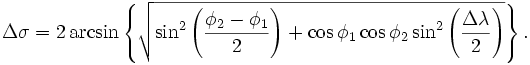

In [1]:
from IPython.display import Image
Image('./pictures/haver.gif')

In [24]:
# Формула гаверсинусов

import math

def haversine(origin, destination, radius=6371.):
    '''
    Points are tuples of (latitude, longitude)

    radius=6371. km
    '''
    lat1, lon1 = origin
    lat2, lon2 = destination

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2.) * math.sin(dlat/2.) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2.) * math.sin(dlon/2.)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1.-a))
    d = radius * c

    return d

MSK = (55.76, 37.61)  # 55°45′21″ с. ш. 37°37′04″ в. д.
SPB = (59.95, 30.61) # 59°57′00″ с. ш. 30°19′00″ в. д. (G) (O) (Я)

print('От Москвы до Санкт-Петербурга {:.2f} км'.format(haversine(SPB, MSK)))

От Москвы до Санкт-Петербурга 622.71 км


<a id='pearson'></a>
#### Формула корреляции Пирсона
[Вверх](#up)

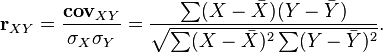

In [2]:
from IPython.display import Image
Image('./pictures/pearson.png')

In [25]:
# Коэффициент корреляции Пирсона 

import random
import numpy as np

def pirson_cc(x, y):
    '''
    Это строка документирования!
    Функция вычисляет для двух последовательностей \
    коэффициент корреляции Пирсона.
    
    Входящие параметры:
    ===================
    
    **x [ndarray]** - одномерный массив длины N;
    **y [ndarray]** - одномерный массив длины N;
    
    Результат выполнения функции:
    =============================
    **сс [float]** - коэффициент корреляции Пирсона.
    '''
    
    xm = x.mean()
    ym = y.mean()

    a = 0
    b1 = 0
    b2 = 0
    for xi, yi in zip(x, y):
        a += (xi - xm)*(yi - ym)
        b1 += (xi - xm)**2 
        b2 += (yi - ym)**2
    b = np.sqrt(b1*b2)
    
    cc = a/b
    
    return cc

N = 60
# методы списка + модуль random
a = list(range(N))
random.shuffle(a)
a = np.array(a)

# модуль numpy
b = np.arange(N)
np.random.shuffle(b)

print (a)
print (b)
print ('CC from def cc: %.3f' % pirson_cc(a, b))
print ('CC from numpy: %.3f' % np.corrcoef(a, b)[0][1])

[35 46 56 43  2 59 54  0 38 10 36 13 25 33 53 26 58 37 11 16 41 47 51 30
 22  1 17 44 57 50 21 24 29  9 52 42  8 39 23 14 45 19 31 18  4 49  3 15
 55 20 40 48 34 32 27  5 28  7  6 12]
[ 4  6 33 32 10 41  1 43 29 12 13  7 42 48  5 37 22 35  3 45 46 24 47 56
 52 20  0 11 26 17  2 51 30 57  8 31 15 23 21 25 28 39 44 55 49 54 59 18
 53 58 34 50  9 38 27 19 40 36 16 14]
CC from def cc: -0.020
CC from numpy: -0.020


<a id='def_unpack'></a>
### Распаковка аргументов
[Наверх](#up)

Помимо передачи по позициям и по ключам, существует способ задать в функции переменное число аргументов. Оно будет зависеть от конкретной реализации вызова функции.

Передавать можно последовательности и словари. За последовательности отвечает символ звёздочка, а за словари - две звёздочки. Распространёнными именами переменных являются:

+ для последовательности ***args**
+ для словаря ****kwargs**

Собственно `args` и `kwargs` - это произвольные имена переменных для распаковки. 

Принято использовать именно такие имена, поэтому их часто можно встретить. Но такими они быть не обязаны. Так имена `*foo` и `**dic` ничем не хуже.

Зная имена таких переменных, их можно использовать для итерационного перебора, либо перебора по ключам.

> Звёздочки необходимо указывать как при описании функции, так и при передаче аргументов при вызове функции.

In [13]:
# Универсальная функция

def unpack(*args, **kwargs):
    '''
    '''
    
    for a in args:
        print(sum(a), *a)
        
    for s in kwargs:
        print('Key in kwargs: {}'.format(s))
    
dic = {'A' : 22, "Sasha" : 45, 'Ginger' : 3}   # словарь
box = [list(range(20)), list(range(13))]   # список списков

unpack(*box, **dic)

190 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
78 0 1 2 3 4 5 6 7 8 9 10 11 12
Key in kwargs: A
Key in kwargs: Sasha
Key in kwargs: Ginger


Можно комбинировать передачу аргументов разных способов соблюдая очередность:
    
1. сначала **позиционные** аргументы;

2. далее **распаковка по позициям**;

3. потом аргументы **по ключам**;

4. наконец **распаковка словарей**.

> Важно соблюдать указанный порядок, иначе поведение функции может привести к ошибке!

In [15]:
# Короткий вариант

import random

def abc(a, *coors, b=20):
    '''
    '''
    y = a + b
    newc = []
    for i, cor in enumerate(coors):
        z = (cor - random.random()*10.)/y
        newc.append(z)
#    print(newc)
    
    return newc

box = list(range(-10, 0))
xx = abc(10, *box)
#print(xx)
print(len(box), len(xx))

10 10


In [16]:
# Полный вариант синтаксиса

import random

def abc(a, *coors, b=20, city='Moscow', **kw):
    '''
    '''
    y = a + b
    newc = []

    for i, cor in enumerate(coors):
        print(i, end=',')
        z = (cor - random.random()*10.)/y
        newc.append(z)

    for j, k in enumerate(kw):
        print('It is a {} key: {}'.format(j, k))
    
    return newc, city

box = list(range(10))
dic = {'A' : 22, "Sasha" : 45, 'Ginger' : 3}   # словарь
xx, town = abc(10, *box, city='Saratov', **dic)

print(len(box), len(xx))
print(town)

0,1,2,3,4,5,6,7,8,9,It is a 0 key: A
It is a 1 key: Sasha
It is a 2 key: Ginger
10 10
Saratov


<a id='lambda'></a>
## Анонимные функции
[Наверх](#up)

В python есть т.н. "анонимные функции", т.е. функции без собственного имени. Обычно это совсем небольшие фрагменты кода (ограничение на одно выражение), которые востребованы при "оборачивании" функции другой функции (например, `map()`, которая принимает в качестве первого аргумента функцию). 

`Lambda-функцию` можно использовать в любом месте программы, где ожидается использование функции.

Иными словами для ряда функций (например **встроенной функции map()**) требуется передать функцию в качестве аргумента. Именно для таких случаев (обычно коротких) и используется анонимная функция, которая в языке python также называется `lambda-функцией`.

За анонимные функции отвечает ключевое слово **lambda**. Оно имеет простую структуру, в общем виде после ключевого слова lambda перечисляются входящие аргументы, затем двоеточие и далее операторы и операции, которые необходимы.

> af = lambda x, y: x + y

У анонимной функции нет **return**, поэтому для возвращения результата необходимо передать анонимную функцию в переменную (af в данном примере). 

Анонимная функция также может иметь необязательные аргументы.

In [22]:
import math

box = range(-25, 10)
new = list(filter(lambda x: x < 0, box))

print(new)

[-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [23]:
# Простая lambda-функция
f = lambda x, y=10: x - y

a = 2
b = -17

print('1. {}\n2. {}\n3.{}'.format(f(a), f(a, b), f(b)))

1. -8
2. 19
3.-27


In [28]:
# Более сложная лямбда-функция

import numpy as np

fi = lambda ss, dd: dd[np.where([(i % 7 == 0) for i in ss])]

zz = list(range(1949, 2011))   # some time data
tt = np.linspace(-80, -17, len(zz))   # some data

x = fi(zz, tt)
print(type(x))
print(x)

<class 'numpy.ndarray'>
[-75.86885246 -68.63934426 -61.40983607 -54.18032787 -46.95081967
 -39.72131148 -32.49180328 -25.26229508 -18.03278689]


In [32]:
import pandas as pd

tc = lambda x: x.strftime('%j')

s = '30/10/2018'
date1 = pd.to_datetime(s, format='%d/%m/%Y')
doy = tc(date1)
print('{} : day of the Year is {}'.format(s, doy))

30/10/2018 : day of the Year is 303


<a id='ff'></a>
## Функция от функции
[Вверх](#up)

Помимо процедурного и объектно-ориентированного стилей или (парадигм) программирования, в python также реализованы элементы **[функционального программирования](https://ru.wikipedia.org/wiki/Функциональное_программирование)**.

**[Числа Фибоначи](https://ru.wikipedia.org/wiki/Числа_Фибоначчи)** — элементы числовой последовательности. 

> 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, …

Среди элементов ФП стоит отметить `рекурсию`, т.е. возможность функции вызывать саму себя. Так например задача о числах Фибоначи может быть решена на python так:

In [23]:
def fib(n):
    if n > 2:
        return fib(n - 1) + fib(n - 2)
    else:
        return 1

for i in range(10):
    print(i, fib(i))

0 1
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


Тот же самый алгоритм с использованием лямбда-функции.

In [22]:
fib = lambda n: fib(n - 1) + fib(n - 2) if n > 2 else 1

for i in range(10):
    print(i, fib(i))

0 1
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


<a id='deco'></a>
### Декораторы
[Вверх](#up)

`Декоратором` называют функцию, которая принимает другую функцию в качестве аргумента. Обычно декоратор расширяет функционал исходной функции или изменяет её поведение.

Для декораторов создан особый синтаксис: декоратор оборачивает функцию, располагаясь над строкой с **def()** функции, которую он оборачивает, в виде строки, начинающейся с символа @имя_функции_декоратора.

In [21]:
def deco(f):
    '''
    '''
    def foo(a):
        print('Текст ДО вызова оборачиваемой функции')
        a.append(-33)
        f(a)
        print('Текст ПОСЛЕ вызова оборачиваемой функции')
        
    return foo
        
@deco  # это вызов декоратора   
def abc(a):
    '''
    '''
    a.append(-99)
    a.insert(0, 14)

N = 100
x = [s for s in range(N) if s % 3 != 0]
print('ДО :', x[0], x[-2])
r = abc(x)
print('ПОСЛЕ :', x[0], x[-2])

ДО : 1 97
Текст ДО вызова оборачиваемой функции
Текст ПОСЛЕ вызова оборачиваемой функции
ПОСЛЕ : 14 -33


Сложно и непонятно зачем это всё? Правильно, нужно хорошо подумать, чтобы привести пример, когда вместо хорошо продуманной функции необходимо её оборачивать другой функцией.

Вот [одно из объяснений (**"ЗАЧЕМ, Карл!?"**)](https://ru.stackoverflow.com/questions/621861/ЗАЧЕМ-нужны-декораторы-НЕ-как-они-работают-а-ЗАЧЕМ):

*"Декораторы — по сути реализация аспектно-ориентированного программирования в Питоне.*

*Вы определяете логику или функциональность отдельно от функций, которые будут пользоваться этой функциональностью. Возможно, эту логику разрабатывает для вас другая команда. Пример с логированием, который вы видели практически везде, или те же транзакции — один из возможных примеров аспекта-функциональности. Затем вы влёгкую можете подключить использование этого аспекта без ручного переписывания функций, просто добавлением или убиранием атрибута.*

*В любом случае, атрибут — часть вашего исходного кода. Если вы хотите, чтобы недекорированная функция была доступна, вы можете просто не ставить декоратор. Или иметь отдельно недекорированную функцию, и отдельно её декорированный вариант, который вызывает недекорированный. Или дописать функциональность, которую вносил декоратор, вручную (но в этом случае вам нужно будет обновить ваш код, если в декораторе произойдут изменения, например, багфикс; это обычная проблема дубляжа кода.)*

*Декоратор просто позволяет вам добавлять функциональность легко."*

Однако, через синтаксис декораторов реализованы некоторые конструкции, с которыми мы познакомимся чуть позже. Например, `"свойства" (@property)` или `"статические методы классов (@classmethod)"`

[Вверх](#up)